In [73]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [74]:
df = pd.read_csv('df-balanceado.csv')

In [75]:
x = df[['Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc? ', 'Sexo', 'Cor ou raça']]
y = df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ' ]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [77]:
y_train.head()

2054    1.0
282     1.0
4886    2.0
2567    1.0
4311    1.0
Name: Diagnóstico de TOC (Transtorno obsessivo compulsivo) , dtype: float64

In [78]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 4613 to 5012
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                             --------------  -----  
 0   Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?   1770 non-null   float64
 1   Sexo                  

In [79]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
forest_pred = clf.predict(x_test)

In [80]:
print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))

[[1087   13]
 [ 517  153]]
              precision    recall  f1-score   support

         1.0       0.68      0.99      0.80      1100
         2.0       0.92      0.23      0.37       670

    accuracy                           0.70      1770
   macro avg       0.80      0.61      0.59      1770
weighted avg       0.77      0.70      0.64      1770



## XG BOOST

In [81]:
# !pip install tensorflow
# !pip install xgboost

import tensorflow as tf
#tf.Session(config=tf.ConfigProto(log_device_placement=True))
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [82]:
# GridSearch como classificador

model = XGBClassifier(
 learning_rate =1,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
n_estimators = [100, 1000]
max_depth = [1, 100]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)

In [83]:
# Adaptação do dataset para ter valores 0 = red e 1 = white

df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ' ].replace(('red', 'white'), (1, 0), inplace=True)

seed = 42 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução
array = df.values

X = df[['Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc? ', 'Sexo', 'Cor ou raça']]
Y = df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ' ]

test_size = 0.3 # Tamanho do conjunto de teste
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
# Ajuste do modelo

grid_result = grid_search.fit(X, Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Best: 0.595347 using {'max_depth': 100, 'n_estimators': 100}
0.590486 (0.000447) with: {'max_depth': 1, 'n_estimators': 100}
0.594797 (0.002770) with: {'max_depth': 1, 'n_estimators': 1000}
0.595347 (0.004111) with: {'max_depth': 100, 'n_estimators': 100}
0.593071 (0.010329) with: {'max_depth': 100, 'n_estimators': 1000}


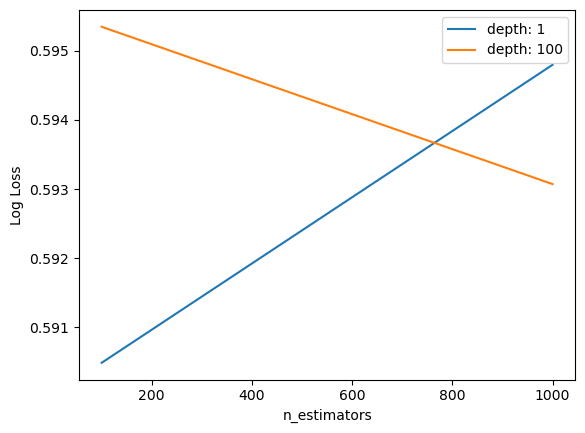

In [85]:
# Resultados

import matplotlib.pyplot as plt
#matplotlib.use('Agg')

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

# Plota os resultados

scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
#plt.savefig('n_estimators_vs_max_depth.png')
plt.show()

## XG BOOST REGRESSOR ???

In [87]:
model = XGBRegressor(n_estimators=100,
                    learning_rate=0.1,
                    max_depth=6,
                    random_state=42,
                    n_jobs=-1,
                    early_stopping_rounds=10)

In [89]:
# Ajusto do modelo

model.fit(
    x_train, 
    y_train, 
    eval_metric="mae",
    eval_set=[(x_test, y_test)],
    verbose=True)

[0]	validation_0-mae:0.46504
[1]	validation_0-mae:0.45986
[2]	validation_0-mae:0.45521
[3]	validation_0-mae:0.45101
[4]	validation_0-mae:0.44724
[5]	validation_0-mae:0.44384
[6]	validation_0-mae:0.44078
[7]	validation_0-mae:0.43803
[8]	validation_0-mae:0.43555
[9]	validation_0-mae:0.43331
[10]	validation_0-mae:0.43131
[11]	validation_0-mae:0.42951
[12]	validation_0-mae:0.42789
[13]	validation_0-mae:0.42642
[14]	validation_0-mae:0.42511
[15]	validation_0-mae:0.42392
[16]	validation_0-mae:0.42285
[17]	validation_0-mae:0.42189
[18]	validation_0-mae:0.42103
[19]	validation_0-mae:0.42026
[20]	validation_0-mae:0.41956
[21]	validation_0-mae:0.41894
[22]	validation_0-mae:0.41837
[23]	validation_0-mae:0.41787
[24]	validation_0-mae:0.41741
[25]	validation_0-mae:0.41700
[26]	validation_0-mae:0.41662
[27]	validation_0-mae:0.41629
[28]	validation_0-mae:0.41599
[29]	validation_0-mae:0.41572
[30]	validation_0-mae:0.41547
[31]	validation_0-mae:0.41525
[32]	validation_0-mae:0.41505
[33]	validation_0-ma

[35]	validation_0-mae:0.41457
[36]	validation_0-mae:0.41444
[37]	validation_0-mae:0.41433
[38]	validation_0-mae:0.41422
[39]	validation_0-mae:0.41413
[40]	validation_0-mae:0.41404
[41]	validation_0-mae:0.41396
[42]	validation_0-mae:0.41389
[43]	validation_0-mae:0.41383
[44]	validation_0-mae:0.41377
[45]	validation_0-mae:0.41372
[46]	validation_0-mae:0.41368
[47]	validation_0-mae:0.41364
[48]	validation_0-mae:0.41360
[49]	validation_0-mae:0.41357
[50]	validation_0-mae:0.41354
[51]	validation_0-mae:0.41351
[52]	validation_0-mae:0.41348
[53]	validation_0-mae:0.41346
[54]	validation_0-mae:0.41344
[55]	validation_0-mae:0.41342
[56]	validation_0-mae:0.41341
[57]	validation_0-mae:0.41339
[58]	validation_0-mae:0.41338
[59]	validation_0-mae:0.41337
[60]	validation_0-mae:0.41336
[61]	validation_0-mae:0.41335
[62]	validation_0-mae:0.41334
[63]	validation_0-mae:0.41333
[64]	validation_0-mae:0.41332
[65]	validation_0-mae:0.41332
[66]	validation_0-mae:0.41331
[67]	validation_0-mae:0.41331
[68]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [91]:
# Realizada a predição nos dados de teste

y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [92]:
# Avalia a predição

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.06%


## Estudando rede neural e fazendo testes com a biblioteca keras

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sexo'] = label_encoder.fit_transform(df['Sexo'])
df['Cor ou raça'] = label_encoder.fit_transform(df['Cor ou raça'])

# Defina seus recursos (X) e rótulo alvo (y)
x = df[['Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc? ', 'Sexo', 'Cor ou raça']]
y = df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ' ]

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crie o modelo da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=3))  # 3 neurônios na camada de entrada
model.add(Dense(32, activation='relu'))  # Camada oculta com 32 neurônios
model.add(Dense(1, activation='sigmoid'))  # Camada de saída com 1 neurônio (para classificação binária)

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
130/130 [==============================] - 3s 7ms/step - loss: -5.9170 - accuracy: 0.6144 - val_loss: -19.2274 - val_accuracy: 0.6350
Epoch 2/100
130/130 [==============================] - 1s 5ms/step - loss: -74.8263 - accuracy: 0.6144 - val_loss: -157.9781 - val_accuracy: 0.6350
Epoch 3/100
130/130 [==============================] - 1s 5ms/step - loss: -344.4841 - accuracy: 0.6144 - val_loss: -561.9332 - val_accuracy: 0.6350
Epoch 4/100
130/130 [==============================] - 1s 8ms/step - loss: -965.8349 - accuracy: 0.6144 - val_loss: -1360.3280 - val_accuracy: 0.6350
Epoch 5/100
130/130 [==============================] - 1s 6ms/step - loss: -2038.5515 - accuracy: 0.6144 - val_loss: -2640.6008 - val_accuracy: 0.6350
Epoch 6/100
130/130 [==============================] - 1s 6ms/step - loss: -3697.0405 - accuracy: 0.6144 - val_loss: -4513.0762 - val_accuracy: 0.6350
Epoch 7/100
130/130 [==============================] - 1s 7ms/step - loss: -6006.0161 - accuracy: 0.6144 